In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

In [2]:
df = pd.read_csv("ahm_part_dataset.csv")

In [3]:
required_cols = ['Stock_Level', 'WIP', 'Deviation']

In [6]:
scaler = StandardScaler()
df[['Stock_Level_norm', 'Deviation_norm']] = scaler.fit_transform(df[['Stock Level', 'Deviation']])
df['Criticality_Score'] = (1 - df['Stock_Level_norm']) + df['Deviation_norm']
df['Criticality'] = pd.qcut(df['Criticality_Score'], 3, labels=['Low', 'Medium', 'High'])


In [9]:
X_crit = df[['Stock Level', 'WIP', 'Deviation']]
y_crit = df['Criticality']
X_train, X_test, y_train, y_test = train_test_split(X_crit, y_crit, test_size=0.3, random_state=42, stratify=y_crit)

In [10]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = rf_classifier.predict(X_test)

In [13]:
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model Klasifikasi: {accuracy:.2f} ({accuracy:.2%})")



Akurasi Model Klasifikasi: 0.99 (99.40%)


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       1.00      1.00      1.00        54
         Low       0.98      1.00      0.99        60
      Medium       1.00      0.98      0.99        54

    accuracy                           0.99       168
   macro avg       0.99      0.99      0.99       168
weighted avg       0.99      0.99      0.99       168



In [15]:
joblib.dump(rf_classifier, 'criticality_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [17]:
X_anomaly = df[['Stock Level', 'WIP']]
iso_forest = IsolationForest(contamination=0.05, random_state=42)
df['Anomaly'] = iso_forest.fit_predict(X_anomaly)

In [18]:
joblib.dump(iso_forest, 'anomaly_model.pkl')
print("✅ Model deteksi anomali disimpan sebagai 'anomaly_model.pkl'")

✅ Model deteksi anomali disimpan sebagai 'anomaly_model.pkl'


In [22]:
anomalies = df[df['Anomaly'] == -1]
print(f"\nTerdeteksi {len(anomalies)} anomali. Menampilkan beberapa di antaranya:")
print(anomalies[['Part Number / Part Name', 'Stock Level', 'WIP', 'Deviation']].head())



Terdeteksi 17 anomali. Menampilkan beberapa di antaranya:
    Part Number / Part Name  Stock Level  WIP  Deviation
3         3051A-K58-N804-DL          130   10        -30
10        64200K58-N900001V          180   35        -20
47        6450AK41-N002INH1          170   10        -40
82        43000KWW-A80000C0          170   10        -20
117       40530-K41-N0ZZ-M0          170   10        -30


📉 Plot deteksi anomali disimpan sebagai 'anomaly_detection_plot.png'


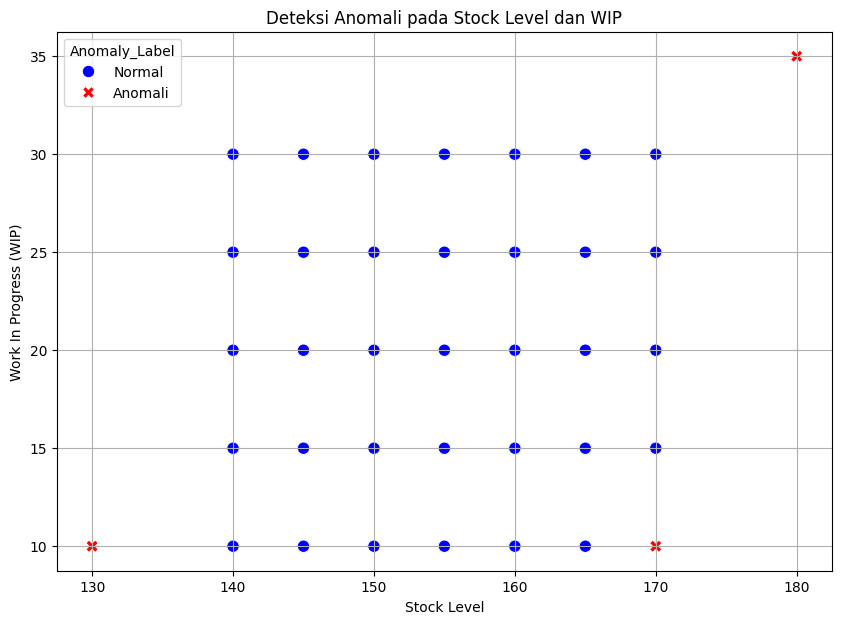

In [24]:
df['Anomaly_Label'] = df['Anomaly'].apply(lambda x: 'Anomali' if x == -1 else 'Normal')
plt.figure(figsize=(10, 7))
sns.scatterplot(data=df, x='Stock Level', y='WIP', hue='Anomaly_Label', style='Anomaly_Label',
                palette={'Normal': 'blue', 'Anomali': 'red'}, markers={'Normal': 'o', 'Anomali': 'X'}, s=80)
plt.title('Deteksi Anomali pada Stock Level dan WIP'); plt.xlabel('Stock Level'); plt.ylabel('Work In Progress (WIP)')
plt.grid(True); plt.savefig('anomaly_detection_plot.png')
print("📉 Plot deteksi anomali disimpan sebagai 'anomaly_detection_plot.png'")
